<a href="https://colab.research.google.com/github/mohamed7456/YOLOv10-v11-v12-Tracking/blob/main/yolo_v10_v11_v12_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YOLO Object Tracking Comparison: v10n, v11n, v12n**

## **Imports**

In [ ]:
!pip install ultralytics deep_sort_realtime opencv-python-headless --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files
from ultralytics import YOLO
import cv2
import time
from deep_sort_realtime.deepsort_tracker import DeepSort
import glob
from IPython.display import HTML, Video, display
from base64 import b64encode
from tabulate import tabulate
from base64 import b64encode
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## **Load Video and Models**

In [ ]:
input_video_path = '/content/test1.mp4'

In [ ]:
yolo_models = ['yolov10n', 'yolo11n', 'yolo12n']

models = {}
for name in yolo_models:
    models[name] = YOLO(name)
    print(f"Model {name} loaded successfully.")

100%|██████████| 5.59M/5.59M [00:00<00:00, 112MB/s]

Model yolov10n loaded successfully.



100%|██████████| 5.35M/5.35M [00:00<00:00, 113MB/s]

Model yolo11n loaded successfully.



100%|██████████| 5.34M/5.34M [00:00<00:00, 94.9MB/s]

Model yolo12n loaded successfully.


## **Objects Tracking**

In [ ]:
inference_speeds = {}
for name, model in models.items():
    print(f"Tracking Objects using {name}...")
    # open the video
    cap = cv2.VideoCapture(input_video_path)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # video writer
    output_path = f"{name}_output.mp4"
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    # tracking objects and measuring inference speed
    total_inference_time = 0
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        start_time = time.time()
        results = model.track(frame, persist=True)
        end_time = time.time()

        total_inference_time += (end_time - start_time)
        frame_count += 1

        annotated_frame = results[0].plot()
        out.write(annotated_frame)

    cap.release()
    out.release()

    avg_inference_speed = total_inference_time / frame_count
    inference_speeds[name] = avg_inference_speed
    print(f"Average inference speed for {name}: {avg_inference_speed:.4f} seconds per frame\n")

Streaming output truncated to the last 5000 lines.

0: 384x640 11 cars, 10.6ms
Speed: 2.1ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 cars, 10.4ms
Speed: 2.3ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 cars, 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 cars, 10.5ms
Speed: 2.9ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 cars, 11.3ms
Speed: 2.4ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 cars, 9.7ms
Speed: 2.5ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 cars, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 cars, 10.5ms
Speed: 2.3ms preprocess, 10.5ms inference, 1.5ms

## **Results**

In [ ]:
df = pd.DataFrame(list(inference_speeds.items()), columns=['Model', 'Inference Speed (s/frame)'])
df

,Model,Inference Speed (s/frame)
0,yolov10n,0.052383
1,yolo11n,0.044919
2,yolo12n,0.052062


### Inference Speed Comparison

---

$$
\begin{array}{|l|c|c|}
\hline
\textbf{Model} & \textbf{Inference Speed (s/frame)} & \textbf{FPS} \\
\hline
\text{YOLOv10n} & 0.0524 & 19.09 \\
\text{YOLOv11n} & 0.0449 & 22.26 \\
\text{YOLOv12n} & 0.0521 & 19.21 \\
\hline
\end{array}
$$


---
- The results show that YOLOv11n achieved the fastest inference, with an average of 0.0449 seconds per frame, equivalent to 22.26 FPS, outperforming both YOLOv10n and YOLOv12n.

- YOLOv10n and YOLOv12n had similar inference times (approximately 0.052 seconds per frame), corresponding to 19 FPS, indicating relatively slower performance.

This suggests that YOLOv11n provides the best real-time processing capability among the three variants tested, making it a suitable choice for applications where speed is a critical factor, such as live object tracking on resource-constrained devices.

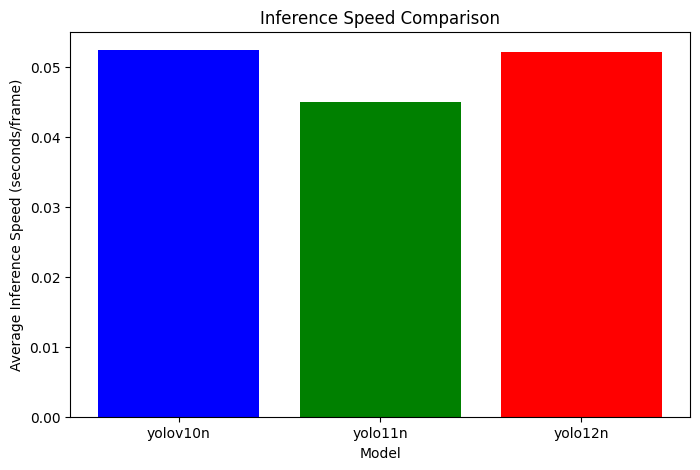

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(df['Model'], df['Inference Speed (s/frame)'], color=['blue', 'green', 'red'])
plt.title('Inference Speed Comparison')
plt.xlabel('Model')
plt.ylabel('Average Inference Speed (seconds/frame)')
plt.show()

### YOLO V10 Output Video

In [ ]:
save_path = "/content/yolov10n_output.mp4"
compressed_path = "/content/output_v10n_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 height=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

### YOLO V11 Output Video

In [ ]:
save_path = "/content/yolo11n_output.mp4"
compressed_path = "/content/output_v11n_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 height=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

### YOLO V12 Output Video

In [ ]:
save_path = "/content/yolo12n_output.mp4"
compressed_path = "/content/output_v12n_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 height=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)